In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("breast-cancer-wisconsin.data",
                 names=["sample_code",
                        "clump-thickness",                      
                        "uniformity_size",
                        "uniformity_shape",
                        "marginal_adhesion",
                        "single_size",
                        "bare_nuclei",
                        "bland_chromatin",
                        "normal_nucleoli",
                        "mitoses",
                        "class"])
df.head()

,sample_code,clump-thickness,uniformity_size,uniformity_shape,marginal_adhesion,single_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.describe()

,sample_code,clump-thickness,uniformity_size,uniformity_shape,marginal_adhesion,single_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
# Verify if there are NAs
np.sum(df.isnull())
# No NA

sample_code          0
clump-thickness      0
uniformity_size      0
uniformity_shape     0
marginal_adhesion    0
single_size          0
bare_nuclei          0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [5]:
df.dtypes

sample_code           int64
clump-thickness       int64
uniformity_size       int64
uniformity_shape      int64
marginal_adhesion     int64
single_size           int64
bare_nuclei          object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [6]:
#Why Bare nuclei is an object instead of an int64?
df['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [7]:
# drop rows where bare_nuclei=?:
df=df[df.bare_nuclei!="?"]
df.info()
# We can try to fill the missing values later if results are not sufficiently good, 
# but for now that seems to be the simplest alternative.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sample_code        683 non-null    int64 
 1   clump-thickness    683 non-null    int64 
 2   uniformity_size    683 non-null    int64 
 3   uniformity_shape   683 non-null    int64 
 4   marginal_adhesion  683 non-null    int64 
 5   single_size        683 non-null    int64 
 6   bare_nuclei        683 non-null    object
 7   bland_chromatin    683 non-null    int64 
 8   normal_nucleoli    683 non-null    int64 
 9   mitoses            683 non-null    int64 
 10  class              683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [8]:
# Convert column to numeric:
df["bare_nuclei"] = pd.to_numeric(df["bare_nuclei"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   sample_code        683 non-null    int64
 1   clump-thickness    683 non-null    int64
 2   uniformity_size    683 non-null    int64
 3   uniformity_shape   683 non-null    int64
 4   marginal_adhesion  683 non-null    int64
 5   single_size        683 non-null    int64
 6   bare_nuclei        683 non-null    int64
 7   bland_chromatin    683 non-null    int64
 8   normal_nucleoli    683 non-null    int64
 9   mitoses            683 non-null    int64
 10  class              683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [9]:
# Separate the target from the features to be used in the classification 
X=df[["clump-thickness",
      "uniformity_size",
      "uniformity_shape",
      "marginal_adhesion",
      "single_size",
      "bare_nuclei",
      "bland_chromatin",
      "normal_nucleoli",
      "mitoses"]]
y=df['class']

In [10]:
# Split the sample into a training set and a test set:
X_train, X_test, y_train, y_test = train_test_split(X, y)

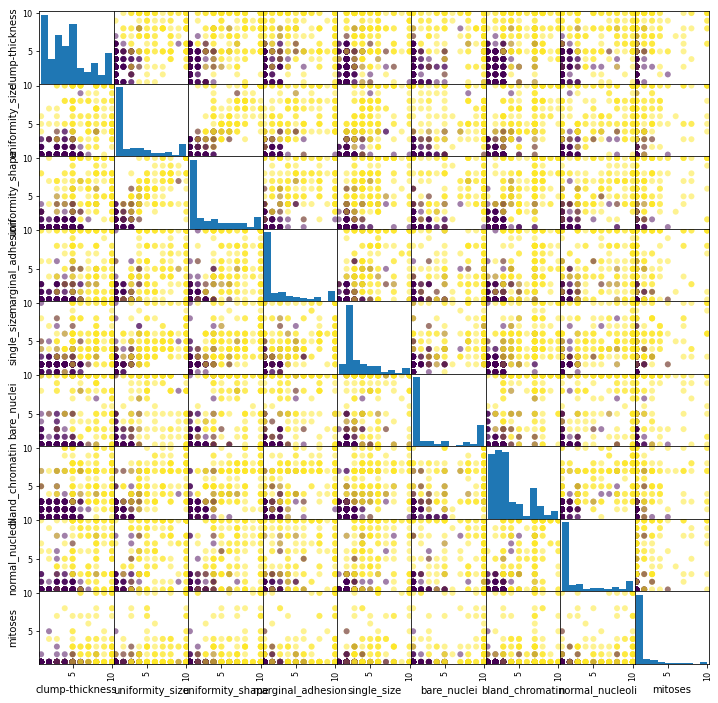

In [11]:
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', figsize=(12,12))

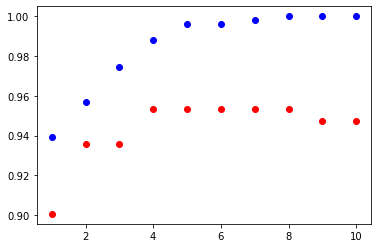

In [12]:
# Classification with a decision tree:
from sklearn import tree

# Fit for different max_depth in order to avoid overfitting:
scores=[]
scorestrain=[]
depths=[]
for maxdepth in range(1,11):
    dtr = tree.DecisionTreeClassifier(max_depth=maxdepth)
    dtr = dtr.fit(X_train, y_train.values.ravel())
    score = dtr.score(X_test, y_test)
    scoretrain = dtr.score(X_train, y_train)
    scores.append(score)
    scorestrain.append(scoretrain)
    depths.append(maxdepth)
plt.plot(depths,scores,'or')
plt.plot(depths,scorestrain,'ob')


In [13]:
# Cross-Validation:

from sklearn.model_selection import cross_val_score

cvscores=[]
depths=[]
meanscores=[]

for maxdepth in range(1,11):
    dtr = tree.DecisionTreeClassifier(max_depth=maxdepth) 
    cv_scores = cross_val_score(dtr, X, y,cv=3)
    cvscores.append(cv_scores)
    depths.append(maxdepth)
    meanscore=np.mean(cv_scores)
    meanscores.append(meanscore)
    
best=meanscores.index(max(meanscores))
print('Best cross-validation scores (3-fold): n_depth=',depths[best] ,", Cross validation scores:", cvscores[best])
print('Best mean cross-validation score (3-fold): {:.3f}'
     .format(max(meanscores)))

Best cross-validation scores (3-fold): n_depth= 4 , Cross validation scores: [0.93421053 0.94298246 0.97356828]
Best mean cross-validation score (3-fold): 0.950
